#1 使用两特征对鸢尾花数据实现随机森林分类的实现

特征：   花萼长度  +  花萼宽度
	预测正确数目： 125
	准确率: 83.33%


特征：   花萼长度  +  花瓣长度
	预测正确数目： 143
	准确率: 95.33%


特征：   花萼长度  +  花瓣宽度
	预测正确数目： 145
	准确率: 96.67%


特征：   花萼宽度  +  花瓣长度
	预测正确数目： 143
	准确率: 95.33%


特征：   花萼宽度  +  花瓣宽度
	预测正确数目： 144
	准确率: 96.00%


特征：   花瓣长度  +  花瓣宽度
	预测正确数目： 145
	准确率: 96.67%


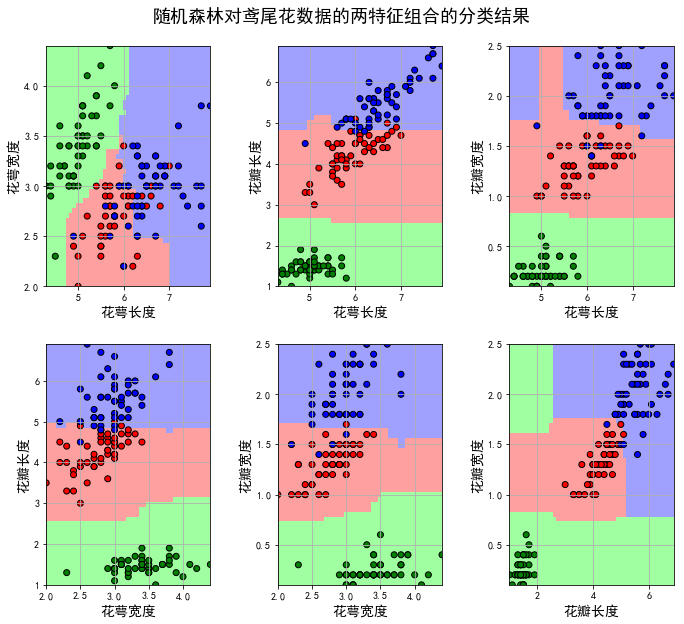

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.ensemble import RandomForestClassifier

def iris_type(s):
    it = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
    return it[s]

iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'

mpl.rcParams['font.sans-serif'] = [u'SimHei']  # 黑体 FangSong/KaiTi
mpl.rcParams['axes.unicode_minus'] = False

data = pd.read_csv('data/iris.data', header=None)
x_prime = data[np.arange(4)]
y = pd.Categorical(data[4]).codes

feature_pairs = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]
plt.figure(figsize=(10, 9), facecolor='#FFFFFF')
for i, pair in enumerate(feature_pairs):
    # 准备数据
    x = x_prime[pair]

    # 随机森林
    clf = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=3)
    clf.fit(x, y.ravel())

    # 画图
    N, M = 50, 50  # 横纵各采样多少个值
    x1_min, x2_min = x.min()
    x1_max, x2_max = x.max()
    t1 = np.linspace(x1_min, x1_max, N)
    t2 = np.linspace(x2_min, x2_max, M)
    x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
    x_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点

    # 训练集上的预测结果
    y_hat = clf.predict(x)
    y = y.reshape(-1)
    c = np.count_nonzero(y_hat == y)    # 统计预测正确的个数
    print('特征：  ', iris_feature[pair[0]], ' + ', iris_feature[pair[1]],)
    print('\t预测正确数目：', c,)
    print('\t准确率: %.2f%%' % (100 * float(c) / float(len(y))))

    # 显示
    cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
    cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
    y_hat = clf.predict(x_test)  # 预测值
    y_hat = y_hat.reshape(x1.shape)  # 使之与输入的形状相同
    plt.subplot(2, 3, i+1)
    plt.pcolormesh(x1, x2, y_hat, cmap=cm_light)  # 预测值
    plt.scatter(x[pair[0]], x[pair[1]], c=y, edgecolors='k', cmap=cm_dark)  # 样本
    plt.xlabel(iris_feature[pair[0]], fontsize=14)
    plt.ylabel(iris_feature[pair[1]], fontsize=14)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.grid()
plt.tight_layout(2.5)
plt.subplots_adjust(top=0.92)
plt.suptitle(u'随机森林对鸢尾花数据的两特征组合的分类结果', fontsize=18)
plt.show()

#2 Bagging算法的采样正确率

9 次采样正确率： 0.621420945449
109 次采样正确率： 0.85292481065


209 次采样正确率： 0.926617485068


309 次采样正确率： 0.961107544182


409 次采样正确率： 0.978755523298


509 次采样正确率： 0.988178639431


609 次采样正确率： 0.993338420965


709 次采样正确率： 0.99621128374


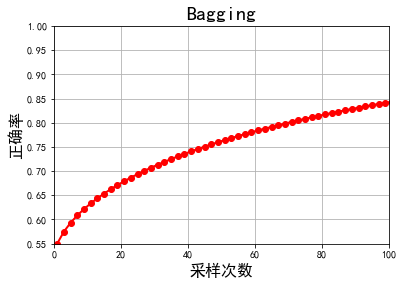

In [3]:
import operator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from functools import reduce

def c(n, k):
    len1 = n - k + 1
    len2 = n + 1
    len3 = k + 1
    c1 = reduce(operator.mul, range(len1, len2))
    c2 = reduce(operator.mul, range(1, len3))
    return  c1 / c2;


def bagging(n, p):
    s = 0
    for i in range(int(n / 2 + 1), int(n + 1)):
        s += c(n, i) * p ** i * (1 - p) ** (n - i)
    return s

n = 800
x = np.arange(1, n, 2)
y = np.empty_like(x, dtype=np.float)
for i, t in enumerate(x):
    y[i] = bagging(t, 0.55)
    if t % 100 == 9:
        print(t, '次采样正确率：', y[i])
mpl.rcParams[u'font.sans-serif'] = u'SimHei'
mpl.rcParams[u'axes.unicode_minus'] = False
plt.figure(facecolor='w')
plt.plot(x, y, 'ro-', lw=2)
plt.xlim(0,100)
plt.ylim(0.55, 1)
plt.xlabel(u'采样次数', fontsize=16)
plt.ylabel(u'正确率', fontsize=16)
plt.title(u'Bagging', fontsize=20)
plt.grid(b=True)
plt.show()